In [16]:
#TAYLOR SPOO
#ASSIGNMENT 7
#STARTED OCT. 16, 2019

#imports
from math import pi, cos, sin, log
import numpy as np
from matplotlib import pyplot as plt

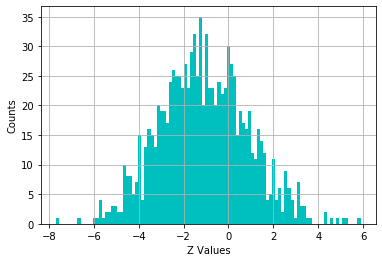

In [48]:
#PROBLEM 1: MONTE CARLO DISTRIVUTION

#variables
std = 2 #standard deviation, sigma
mean = -1 #z-naught

def r(sig): #this function generates the r values
    m = np.random.rand()
    return (-2*(sig**2)*log(1-m))**(1/2)

def x_val(Rad): #this function takes the random r and theta to generate the x values
    theta = 2*pi*np.random.rand()
    return Rad*cos(theta)

def y_val(R): #this function takes the random r and theta to generate the y values
    theta = 2*pi*np.random.rand()
    return R*sin(theta)

#generate 1000 random deviates
count = 0
x_list = []
y_list = []
z_list = []
while count<1000:
    radius = r(std)
    x = x_val(radius)
    y = y_val(radius)
    z = x+mean #gaussian shift
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)
    count+=1
    
#print(len(x_list))
#print(type(x_list))
#print(x_list)
#print(z_list)
plt.hist(z_list, 100, color="c")
plt.xlabel("Z Values")
plt.ylabel("Counts")
plt.grid()

In [41]:
#PROBLEM 2: RADIOACTIVE DECAY

#inital atom count
NBi213 = 10000
NPb = 0
NTl = 0
NBi209 = 0

#half-life for each element
tauTl = 2.2*60 #[s]
tauPb = 3.3*60 #[s]
tauBi213 = 46*60 #[s]

#time parameters
tstep = 1.0 #size of the time step, [s]
tmax = 20000 #total time

#prob of decay for a single atom in one step
def prob_decay(tau):
    return 1-2**(-tstep/tau)

#create lists of atoms
tvals = np.arange(0.0,tmax,tstep)
Bi213vals = []
Pbvals = []
Tlvals = []
Bi209vals = []

In [42]:
for t in tvals:
    Bi213vals.append(NBi213)
    Tlvals.append(NTl)
    Pbvals.append(NPb)
    Bi209vals.append(NBi209)
    
    #intial count of decays
    decay1=0
    decay2=0
    decay3=0
    
    for i in range(NPb):
        if np.random.rand() < prob_decay(tauPb):
            decay1+=1
    NPb -= decay1
    NBi209 += decay1
    
    for j in range(NTl):
        if np.random.rand() < prob_decay(tauTl):
            decay2+=1
    NTl -= decay2
    NPb += decay2
    
    for k in range(NBi213):
        if np.random.rand() < prob_decay(tauBi213):
            decay3+=1
            if np.random.rand() > 0.0209:
                #decays to Pb
                NPb += decay3
                NBi213 -= decay3
            else:
                #decays to Tl
                NTl += decay3
                NBi213 -= decay3
# logic check
dp=Pbvals[-1]+Tlvals[-1]+Bi209vals[-1]
Bip=Bi213vals[-1]
print(dp)
print(Bip)
print(dp+Bip)

9970
30
10000


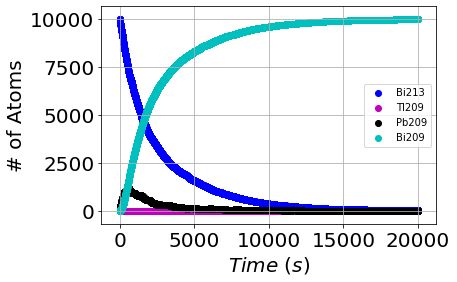

In [47]:
#plotting
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tvals,Bi213vals, c="b", label="Bi213")
ax.scatter(tvals,Tlvals,c="m", label="Tl209")
ax.scatter(tvals,Pbvals,c="k", label="Pb209")
ax.scatter(tvals,Bi209vals,c="c", label="Bi209")
ax.set_xlabel("$Time$ $(s)$", size=20)
ax.set_ylabel("# of Atoms", size=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.grid()
ax.legend()